# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
import json
import requests
import random

from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from citipy import citipy
from random import randint
from scipy.stats import linregress
from Config import api_key
output_data_file="output_data/cities.csv"


In [18]:
#Create citiy list from citypi using lat and long
cities = []
lats_long=[]
weather_info=[]
lat_range=(-90,90)
long_range=(-180,180)

lats = np.random.uniform(low=-90,high=90,size=1500)
lons = np.random.uniform(low=-180,high=180, size=1500)
lats_longs = zip(lats,lons)
   
for lats_long in lats_longs:
    city = citipy.nearest_city(lats_long[0],lats_long[1]).city_name
    
    if city not in cities:
            cities.append(city)            
print(cities)    
print(len(cities))
print(city)

['bakchar', 'tabuk', 'busselton', 'cape town', 'port alfred', 'mar del plata', 'los llanos de aridane', 'beringovskiy', 'kahului', 'atuona', 'port blair', 'pisco', 'solnechnyy', 'cherskiy', 'jamestown', 'talnakh', 'bubaque', 'letka', 'flinders', 'abalak', 'yellowknife', 'krasni okny', 'hobart', 'rikitea', 'vaini', 'bullas', 'mogadishu', 'qaanaaq', 'albany', 'taolanaro', 'carnarvon', 'punta arenas', 'kayerkan', 'poum', 'port macquarie', 'kapaa', 'puerto baquerizo moreno', 'sancti spiritus', 'bluff', 'esperance', 'tuktoyaktuk', 'wanning', 'namatanai', 'bathsheba', 'mataura', 'vaitupu', 'barentsburg', 'attawapiskat', 'kendari', 'new norfolk', 'kieta', 'saleaula', 'ixtapa', 'samarai', 'cananea', 'srednekolymsk', 'baturinskaya', 'upernavik', 'mitsamiouli', 'kavieng', 'saint-philippe', 'arvika', 'nabire', 'xiaoshan', 'fortuna', 'nikolskoye', 'burnie', 'victoria', 'georgetown', 'carthage', 'hilo', 'puerto ayora', 'saskylakh', 'brignoles', 'ribeira grande', 'lavrentiya', 'laguna', 'arraial do 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
city_info=[]
name=[]
city_infolat=[]
city_infolong=[]
temp=[]
max_temp=[]
Humidity=[]
Cloudiness=[]
wind_speed=[]
Country=[]
Date=[]
url="http://api.openweathermap.org/data/2.5/weather?"
units="Imperial"
print("Beginning Data Retrieval")

count=1
for city in cities:
    query_url=f"{url}appid={api_key}&units={units}&q="
    print(f"Process Record {count}---{city}")
    count=count +1
    response=requests.get(query_url +city).json()
    print(response)
    city_info.append(response)


Beginning Data Retrieval
Process Record 1---bakchar
{'coord': {'lon': 82.07, 'lat': 57.02}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 38.8, 'feels_like': 30.47, 'temp_min': 38.8, 'temp_max': 38.8, 'pressure': 994, 'humidity': 75, 'sea_level': 994, 'grnd_level': 981}, 'visibility': 10000, 'wind': {'speed': 8.34, 'deg': 171}, 'clouds': {'all': 88}, 'dt': 1603318032, 'sys': {'country': 'RU', 'sunrise': 1603329607, 'sunset': 1603365115}, 'timezone': 25200, 'id': 1511057, 'name': 'Bakchar', 'cod': 200}
Process Record 2---tabuk
{'coord': {'lon': 121.44, 'lat': 17.42}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 73.04, 'feels_like': 77.92, 'temp_min': 73.04, 'temp_max': 73.04, 'pressure': 1005, 'humidity': 88, 'sea_level': 1005, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 4.23, 'deg': 191}, 'clouds': {'all'

{'coord': {'lon': 88.4, 'lat': 69.49}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 12.2, 'feels_like': -2.49, 'temp_min': 12.2, 'temp_max': 12.2, 'pressure': 995, 'humidity': 85}, 'visibility': 2500, 'wind': {'speed': 15.66, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1603318034, 'sys': {'type': 1, 'id': 8951, 'country': 'RU', 'sunrise': 1603331180, 'sunset': 1603360503}, 'timezone': 25200, 'id': 1490256, 'name': 'Talnakh', 'cod': 200}
Process Record 17---bubaque
{'coord': {'lon': -15.83, 'lat': 11.28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.06, 'feels_like': 86.74, 'temp_min': 82.06, 'temp_max': 82.06, 'pressure': 1013, 'humidity': 83, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 11.52, 'deg': 281}, 'clouds': {'all': 97}, 'dt': 1603317910, 'sys': {'country': 'GW', 'sunrise': 1603263183, 'su

{'coord': {'lon': -70.92, 'lat': -53.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 48.09, 'feels_like': 40.64, 'temp_min': 48, 'temp_max': 48.2, 'pressure': 1007, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 310}, 'clouds': {'all': 90}, 'dt': 1603317964, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 1603272150, 'sunset': 1603323217}, 'timezone': -10800, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
Process Record 33---kayerkan
{'coord': {'lon': 87.76, 'lat': 69.35}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 12.2, 'feels_like': -2.49, 'temp_min': 12.2, 'temp_max': 12.2, 'pressure': 995, 'humidity': 85}, 'visibility': 2500, 'wind': {'speed': 15.66, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1603318035, 'sys': {'type': 1, 'id': 8951, 'country': 'RU', 'sunrise': 1603331278, 'sunset': 16033

{'cod': '404', 'message': 'city not found'}
Process Record 53---ixtapa
{'coord': {'lon': -105.2, 'lat': 20.7}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 88.41, 'feels_like': 96.84, 'temp_min': 87.8, 'temp_max': 89.01, 'pressure': 1007, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 220}, 'clouds': {'all': 40}, 'dt': 1603318038, 'sys': {'type': 1, 'id': 7156, 'country': 'MX', 'sunrise': 1603285100, 'sunset': 1603326720}, 'timezone': -18000, 'id': 4004293, 'name': 'Ixtapa', 'cod': 200}
Process Record 54---samarai
{'coord': {'lon': 150.67, 'lat': -10.62}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.08, 'feels_like': 84.78, 'temp_min': 80.08, 'temp_max': 80.08, 'pressure': 1011, 'humidity': 82, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 9.1, 'deg': 126}, 'clo

{'coord': {'lon': 10.33, 'lat': 36.86}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 69.8, 'feels_like': 65.1, 'temp_min': 69.8, 'temp_max': 69.8, 'pressure': 1021, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 150}, 'clouds': {'all': 20}, 'dt': 1603318039, 'sys': {'type': 1, 'id': 1194, 'country': 'TN', 'sunrise': 1603258312, 'sunset': 1603298059}, 'timezone': 3600, 'id': 2468245, 'name': 'Carthage', 'cod': 200}
Process Record 71---hilo
{'coord': {'lon': -155.09, 'lat': 19.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 79.57, 'feels_like': 78.06, 'temp_min': 75.99, 'temp_max': 84.2, 'pressure': 1014, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 8.39, 'deg': 102}, 'clouds': {'all': 75}, 'dt': 1603317884, 'sys': {'type': 1, 'id': 7881, 'country': 'US', 'sunrise': 1603297026, 'sunset': 16033

{'coord': {'lon': -169.92, 'lat': -19.06}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 76.17, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1015, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 130}, 'clouds': {'all': 90}, 'dt': 1603317797, 'sys': {'type': 1, 'id': 7306, 'country': 'NU', 'sunrise': 1603298700, 'sunset': 1603344183}, 'timezone': -39600, 'id': 4036284, 'name': 'Alofi', 'cod': 200}
Process Record 89---varkaus
{'coord': {'lon': 27.87, 'lat': 62.32}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 36.66, 'feels_like': 26.8, 'temp_min': 36, 'temp_max': 37.99, 'pressure': 1009, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 150}, 'rain': {'1h': 2.26}, 'clouds': {'all': 90}, 'dt': 1603318041, 'sys': {'type': 1, 'id': 1357, 'country': 'FI', '

{'coord': {'lon': 76.5, 'lat': 64.43}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 19.6, 'feels_like': 9.77, 'temp_min': 19.6, 'temp_max': 19.6, 'pressure': 998, 'humidity': 97, 'sea_level': 998, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 8.39, 'deg': 277}, 'clouds': {'all': 28}, 'dt': 1603318042, 'sys': {'country': 'RU', 'sunrise': 1603332415, 'sunset': 1603364980}, 'timezone': 18000, 'id': 1539209, 'name': 'Gubkinskiy', 'cod': 200}
Process Record 107---vila
{'coord': {'lon': -8.16, 'lat': 42.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.01, 'feels_like': 48.36, 'temp_min': 51.01, 'temp_max': 51.01, 'pressure': 1006, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 227, 'gust': 7}, 'clouds': {'all': 9}, 'dt': 1603317981, 'sys': {'type': 3, 'id': 2007751, 'country': 'PT', 'sunrise': 1

{'coord': {'lon': -58.65, 'lat': 51.23}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 41.63, 'feels_like': 35.31, 'temp_min': 41.63, 'temp_max': 41.63, 'pressure': 1029, 'humidity': 65, 'sea_level': 1029, 'grnd_level': 1025}, 'visibility': 10000, 'wind': {'speed': 4.56, 'deg': 161}, 'clouds': {'all': 76}, 'dt': 1603318044, 'sys': {'country': 'CA', 'sunrise': 1603276140, 'sunset': 1603313338}, 'timezone': -14400, 'id': 6137462, 'name': 'Saint-Augustin', 'cod': 200}
Process Record 124---rawannawi
{'cod': '404', 'message': 'city not found'}
Process Record 125---guerrero negro
{'coord': {'lon': -114.06, 'lat': 27.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 70.99, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1008, 'humidity': 63, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'spee

{'coord': {'lon': 18.75, 'lat': -28.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.44, 'feels_like': 59.11, 'temp_min': 69.44, 'temp_max': 69.44, 'pressure': 1013, 'humidity': 19, 'sea_level': 1013, 'grnd_level': 902}, 'visibility': 10000, 'wind': {'speed': 10.47, 'deg': 90}, 'clouds': {'all': 0}, 'dt': 1603318047, 'sys': {'country': 'NA', 'sunrise': 1603339274, 'sunset': 1603385838}, 'timezone': 7200, 'id': 3356343, 'name': 'Karasburg', 'cod': 200}
Process Record 140---hammerfest
{'coord': {'lon': 23.68, 'lat': 70.66}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 28.4, 'feels_like': 15.85, 'temp_min': 28.4, 'temp_max': 28.4, 'pressure': 1010, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 130}, 'clouds': {'all': 0}, 'dt': 1603318048, 'sys': {'type': 1, 'id': 1632, 'country': 'NO', 'sunrise': 1603347275,

{'cod': '404', 'message': 'city not found'}
Process Record 158---praia
{'coord': {'lon': -23.51, 'lat': 14.92}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 79.54, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1015, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 30}, 'clouds': {'all': 62}, 'dt': 1603318049, 'sys': {'type': 1, 'id': 2462, 'country': 'CV', 'sunrise': 1603265201, 'sunset': 1603307412}, 'timezone': -3600, 'id': 3374333, 'name': 'Praia', 'cod': 200}
Process Record 159---sanchursk
{'coord': {'lon': 47.25, 'lat': 56.94}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 28.85, 'feels_like': 19.4, 'temp_min': 28.85, 'temp_max': 28.85, 'pressure': 1017, 'humidity': 96, 'sea_level': 1017, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 9.42, 'deg': 285}, 'clouds': {'all

{'coord': {'lon': -51.72, 'lat': 64.18}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.09, 'feels_like': 20.44, 'temp_min': 30, 'temp_max': 30.2, 'pressure': 1009, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 20}, 'clouds': {'all': 75}, 'dt': 1603318051, 'sys': {'type': 1, 'id': 86, 'country': 'GL', 'sunrise': 1603276605, 'sunset': 1603309547}, 'timezone': -7200, 'id': 3421319, 'name': 'Nuuk', 'cod': 200}
Process Record 176---flin flon
{'coord': {'lon': -101.86, 'lat': 54.77}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.4, 'feels_like': 20.25, 'temp_min': 28.4, 'temp_max': 28.4, 'pressure': 1019, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 300}, 'clouds': {'all': 75}, 'dt': 1603317966, 'sys': {'type': 1, 'id': 782, 'country': 'CA', 'sunrise': 1603286962, 'sunset': 16

{'coord': {'lon': -116.68, 'lat': 31.9}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 73, 'feels_like': 76.68, 'temp_min': 73, 'temp_max': 73, 'pressure': 1008, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 19, 'gust': 4}, 'clouds': {'all': 34}, 'dt': 1603318053, 'sys': {'type': 3, 'id': 2001695, 'country': 'MX', 'sunrise': 1603288488, 'sunset': 1603328842}, 'timezone': -25200, 'id': 4007503, 'name': 'El Sauzal de Rodríguez', 'cod': 200}
Process Record 196---ahipara
{'coord': {'lon': 173.17, 'lat': -35.17}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 59.68, 'feels_like': 57.7, 'temp_min': 59.68, 'temp_max': 59.68, 'pressure': 1022, 'humidity': 84, 'sea_level': 1022, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 59}, 'rain': {'1h': 0.19}, 'clouds': {'all': 100}, 'dt': 1603318

{'coord': {'lon': -97.86, 'lat': 55.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.2, 'feels_like': 21.06, 'temp_min': 30.2, 'temp_max': 30.2, 'pressure': 1018, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 280}, 'clouds': {'all': 75}, 'dt': 1603317971, 'sys': {'type': 1, 'id': 935, 'country': 'CA', 'sunrise': 1603286136, 'sunset': 1603322162}, 'timezone': -18000, 'id': 6165406, 'name': 'Thompson', 'cod': 200}
Process Record 211---grand river south east
{'cod': '404', 'message': 'city not found'}
Process Record 212---tuy hoa
{'coord': {'lon': 109.3, 'lat': 13.08}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 71.96, 'feels_like': 74.16, 'temp_min': 71.96, 'temp_max': 71.96, 'pressure': 1009, 'humidity': 83, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 6.69, 'd

{'coord': {'lon': 108.75, 'lat': 50.36}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.39, 'feels_like': 17.56, 'temp_min': 24.39, 'temp_max': 24.39, 'pressure': 1026, 'humidity': 87, 'sea_level': 1026, 'grnd_level': 934}, 'visibility': 10000, 'wind': {'speed': 3.42, 'deg': 187}, 'clouds': {'all': 99}, 'dt': 1603318056, 'sys': {'country': 'RU', 'sunrise': 1603322320, 'sunset': 1603359596}, 'timezone': 32400, 'id': 2012349, 'name': 'Krasnyy Chikoy', 'cod': 200}
Process Record 228---aklavik
{'coord': {'lon': -135.01, 'lat': 68.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.2, 'feels_like': 14.58, 'temp_min': 21.2, 'temp_max': 21.2, 'pressure': 1038, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1603317965, 'sys': {'type': 1, 'id': 821, 'country': 'CA', 'sunr

{'coord': {'lon': 127.67, 'lat': 26.12}, 'weather': [{'id': 522, 'main': 'Rain', 'description': 'heavy intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 75.15, 'feels_like': 81.88, 'temp_min': 75, 'temp_max': 75.2, 'pressure': 1009, 'humidity': 94}, 'visibility': 2500, 'wind': {'speed': 4.7, 'deg': 140}, 'rain': {'1h': 4.13}, 'clouds': {'all': 75}, 'dt': 1603318058, 'sys': {'type': 1, 'id': 8137, 'country': 'JP', 'sunrise': 1603315914, 'sunset': 1603356922}, 'timezone': 32400, 'id': 1861280, 'name': 'Itoman', 'cod': 200}
Process Record 243---ndago
{'coord': {'lon': 34.35, 'lat': -4.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.23, 'feels_like': 63.36, 'temp_min': 70.23, 'temp_max': 70.23, 'pressure': 1013, 'humidity': 52, 'sea_level': 1013, 'grnd_level': 859}, 'visibility': 10000, 'wind': {'speed': 13.24, 'deg': 101}, 'clouds': {'all': 100}, 'dt': 1603318058, 'sys': {'

{'coord': {'lon': -83.57, 'lat': 46.25}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 44.6, 'feels_like': 38.52, 'temp_min': 44.6, 'temp_max': 44.6, 'pressure': 1019, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 260, 'gust': 18.34}, 'clouds': {'all': 90}, 'dt': 1603318060, 'sys': {'type': 1, 'id': 3858, 'country': 'CA', 'sunrise': 1603281616, 'sunset': 1603319823}, 'timezone': -14400, 'id': 6164831, 'name': 'Thessalon', 'cod': 200}
Process Record 260---gambo
{'coord': {'lon': 22.26, 'lat': 4.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.39, 'feels_like': 76.95, 'temp_min': 70.39, 'temp_max': 70.39, 'pressure': 1012, 'humidity': 94, 'sea_level': 1012, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 0.67, 'deg': 89}, 'clouds': {'all': 81}, 'dt': 1603318060, 'sys': {'country': 'CF',

{'cod': '404', 'message': 'city not found'}
Process Record 279---vagur
{'coord': {'lon': -6.81, 'lat': 61.47}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 43.95, 'feels_like': 31.05, 'temp_min': 43.95, 'temp_max': 43.95, 'pressure': 1005, 'humidity': 69, 'sea_level': 1005, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 17.25, 'deg': 40}, 'clouds': {'all': 25}, 'dt': 1603318007, 'sys': {'country': 'FO', 'sunrise': 1603265208, 'sunset': 1603299389}, 'timezone': 3600, 'id': 2610806, 'name': 'Vágur', 'cod': 200}
Process Record 280---boa vista
{'coord': {'lon': -60.67, 'lat': 2.82}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 93.2, 'feels_like': 93.74, 'temp_min': 93.2, 'temp_max': 93.2, 'pressure': 1009, 'humidity': 41}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 120}, 'clouds': {'all': 20}, 'dt': 16033

{'coord': {'lon': -51.1, 'lat': 69.22}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.4, 'feels_like': 21.43, 'temp_min': 28.4, 'temp_max': 28.4, 'pressure': 1007, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 160}, 'clouds': {'all': 100}, 'dt': 1603317968, 'sys': {'type': 1, 'id': 165, 'country': 'GL', 'sunrise': 1603277996, 'sunset': 1603307858}, 'timezone': -7200, 'id': 3423146, 'name': 'Ilulissat', 'cod': 200}
Process Record 298---birjand
{'coord': {'lon': 59.22, 'lat': 32.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 44.6, 'feels_like': 32.83, 'temp_min': 44.6, 'temp_max': 44.6, 'pressure': 1022, 'humidity': 10}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 110}, 'clouds': {'all': 0}, 'dt': 1603318064, 'sys': {'type': 1, 'id': 7481, 'country': 'IR', 'sunrise': 1603332757, 'sunset': 160

{'coord': {'lon': 31.58, 'lat': 40.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55, 'feels_like': 52.25, 'temp_min': 55, 'temp_max': 55, 'pressure': 1021, 'humidity': 66, 'sea_level': 1021, 'grnd_level': 930}, 'visibility': 10000, 'wind': {'speed': 2.37, 'deg': 111}, 'clouds': {'all': 0}, 'dt': 1603318065, 'sys': {'country': 'TR', 'sunrise': 1603339952, 'sunset': 1603379002}, 'timezone': 10800, 'id': 750510, 'name': 'Bolu Province', 'cod': 200}
Process Record 313---yerbogachen
{'coord': {'lon': 108.01, 'lat': 61.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.32, 'feels_like': 11.84, 'temp_min': 20.32, 'temp_max': 20.32, 'pressure': 1013, 'humidity': 96, 'sea_level': 1013, 'grnd_level': 979}, 'visibility': 10000, 'wind': {'speed': 6.06, 'deg': 174}, 'clouds': {'all': 83}, 'dt': 1603318065, 'sys': {'country': 'RU', 'su

{'coord': {'lon': 25.14, 'lat': 5.03}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 71.44, 'feels_like': 77.97, 'temp_min': 71.44, 'temp_max': 71.44, 'pressure': 1012, 'humidity': 92, 'sea_level': 1012, 'grnd_level': 949}, 'visibility': 10000, 'wind': {'speed': 1.05, 'deg': 254}, 'rain': {'1h': 0.28}, 'clouds': {'all': 100}, 'dt': 1603318067, 'sys': {'country': 'CF', 'sunrise': 1603253060, 'sunset': 1603296204}, 'timezone': 3600, 'id': 235826, 'name': 'Zemio', 'cod': 200}
Process Record 330---bengkulu
{'coord': {'lon': 102.27, 'lat': -3.8}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.11, 'feels_like': 84.31, 'temp_min': 77.11, 'temp_max': 77.11, 'pressure': 1009, 'humidity': 84, 'sea_level': 1009, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 2.51, 'deg': 9}, 'clouds': {'all': 100}, 'dt': 1603317977, 'sys': 

{'coord': {'lon': 102.28, 'lat': 60.34}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 31.75, 'feels_like': 23.02, 'temp_min': 31.75, 'temp_max': 31.75, 'pressure': 1009, 'humidity': 98, 'sea_level': 1009, 'grnd_level': 975}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 193}, 'clouds': {'all': 100}, 'dt': 1603317992, 'sys': {'country': 'RU', 'sunrise': 1603325317, 'sunset': 1603359705}, 'timezone': 25200, 'id': 2013727, 'name': 'Vanavara', 'cod': 200}
Process Record 345---klaksvik
{'coord': {'lon': -6.59, 'lat': 62.23}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 37.4, 'feels_like': 33.44, 'temp_min': 37.4, 'temp_max': 37.4, 'pressure': 1006, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 0}, 'clouds': {'all': 50}, 'dt': 1603317994, 'sys': {'type': 1, 'id': 1596, 'country': 'FO', 'sunrise'

{'coord': {'lon': 49.05, 'lat': -13.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.86, 'feels_like': 75.36, 'temp_min': 72.86, 'temp_max': 72.86, 'pressure': 1014, 'humidity': 73, 'sea_level': 1014, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 3.96, 'deg': 103}, 'clouds': {'all': 77}, 'dt': 1603318070, 'sys': {'country': 'MG', 'sunrise': 1603332839, 'sunset': 1603377731}, 'timezone': 10800, 'id': 1082243, 'name': 'Ambilobe', 'cod': 200}
Process Record 360---astaneh-ye ashrafiyeh
{'coord': {'lon': 49.94, 'lat': 37.26}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 63.16, 'feels_like': 63.14, 'temp_min': 63.16, 'temp_max': 63.16, 'pressure': 1027, 'humidity': 75, 'sea_level': 1027, 'grnd_level': 1028}, 'visibility': 10000, 'wind': {'speed': 2.84, 'deg': 58}, 'clouds': {'all': 94}, 'dt': 1603318070, 'sys'

{'coord': {'lon': 112.47, 'lat': 63.01}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7.09, 'feels_like': -0.44, 'temp_min': 7.09, 'temp_max': 7.09, 'pressure': 1014, 'humidity': 96, 'sea_level': 1014, 'grnd_level': 966}, 'visibility': 10000, 'wind': {'speed': 2.71, 'deg': 213}, 'clouds': {'all': 56}, 'dt': 1603317976, 'sys': {'country': 'RU', 'sunrise': 1603323422, 'sunset': 1603356710}, 'timezone': 32400, 'id': 2025456, 'name': 'Chernyshevskiy', 'cod': 200}
Process Record 377---metu
{'coord': {'lon': 35.58, 'lat': 8.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 56.05, 'feels_like': 56.48, 'temp_min': 56.05, 'temp_max': 56.05, 'pressure': 1015, 'humidity': 97, 'sea_level': 1015, 'grnd_level': 832}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 132}, 'clouds': {'all': 1}, 'dt': 1603318028, 'sys': {'country': 'ET', 'sunr

{'coord': {'lon': 10.66, 'lat': -3.43}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.25, 'feels_like': 84.2, 'temp_min': 77.25, 'temp_max': 77.25, 'pressure': 1014, 'humidity': 87, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 229}, 'clouds': {'all': 100}, 'dt': 1603317997, 'sys': {'country': 'GA', 'sunrise': 1603256145, 'sunset': 1603300068}, 'timezone': 3600, 'id': 2399001, 'name': 'Mayumba', 'cod': 200}
Process Record 394---jalu
{'coord': {'lon': 21.55, 'lat': 29.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.6, 'feels_like': 58.3, 'temp_min': 64.6, 'temp_max': 64.6, 'pressure': 1022, 'humidity': 59, 'sea_level': 1022, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 11.3, 'deg': 336}, 'clouds': {'all': 0}, 'dt': 1603317950, 'sys': {'country': 'LY', 'sunrise

{'coord': {'lon': -83.23, 'lat': 15}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 82.87, 'feels_like': 88.07, 'temp_min': 82.87, 'temp_max': 82.87, 'pressure': 1007, 'humidity': 77, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 9.04, 'deg': 339}, 'rain': {'1h': 0.11}, 'clouds': {'all': 91}, 'dt': 1603317940, 'sys': {'country': 'HN', 'sunrise': 1603279540, 'sunset': 1603321736}, 'timezone': -21600, 'id': 3608828, 'name': 'Iralaya', 'cod': 200}
Process Record 411---halifax
{'coord': {'lon': -63.57, 'lat': 44.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.98, 'feels_like': 56.71, 'temp_min': 55, 'temp_max': 57, 'pressure': 1025, 'humidity': 100}, 'visibility': 9980, 'wind': {'speed': 1.99, 'deg': 120, 'gust': 7}, 'clouds': {'all': 97}, 'dt': 1603318003, 'sys': {'type': 3, 'id': 2019613, 'c

{'coord': {'lon': 71.72, 'lat': 40.43}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 44.67, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1020, 'humidity': 35}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1603317993, 'sys': {'type': 1, 'id': 9014, 'country': 'UZ', 'sunrise': 1603330292, 'sunset': 1603369397}, 'timezone': 18000, 'id': 1513491, 'name': 'Yangi Marg`ilon', 'cod': 200}
Process Record 427---nizhneyansk
{'cod': '404', 'message': 'city not found'}
Process Record 428---manzanillo
{'coord': {'lon': -77.12, 'lat': 20.34}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.38, 'feels_like': 92.14, 'temp_min': 82.38, 'temp_max': 82.38, 'pressure': 1010, 'humidity': 77, 'sea_level': 1010, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 0.47, 'deg

{'coord': {'lon': -96.47, 'lat': 15.74}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 86.86, 'feels_like': 94.06, 'temp_min': 86, 'temp_max': 87.8, 'pressure': 1009, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 4.68, 'deg': 214}, 'clouds': {'all': 20}, 'dt': 1603317899, 'sys': {'type': 1, 'id': 7096, 'country': 'MX', 'sunrise': 1603282754, 'sunset': 1603324876}, 'timezone': -18000, 'id': 3517970, 'name': 'Pochutla', 'cod': 200}
Process Record 445---at-bashi
{'coord': {'lon': 75.81, 'lat': 41.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 34.99, 'feels_like': 30.02, 'temp_min': 34.99, 'temp_max': 34.99, 'pressure': 1022, 'humidity': 71, 'sea_level': 1022, 'grnd_level': 797}, 'visibility': 10000, 'wind': {'speed': 1.19, 'deg': 219}, 'clouds': {'all': 0}, 'dt': 1603318079, 'sys': {'country': 'KG', 'sunrise': 1603329369,

{'coord': {'lon': 73.1, 'lat': 6.88}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.19, 'feels_like': 84.67, 'temp_min': 81.19, 'temp_max': 81.19, 'pressure': 1007, 'humidity': 81, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 12.01, 'deg': 295}, 'clouds': {'all': 100}, 'dt': 1603318080, 'sys': {'country': 'MV', 'sunrise': 1603328036, 'sunset': 1603370991}, 'timezone': 18000, 'id': 1337612, 'name': 'Dhidhdhoo', 'cod': 200}
Process Record 462---oskemen
{'coord': {'lon': 82.61, 'lat': 49.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 40.78, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1011, 'humidity': 32}, 'visibility': 10000, 'wind': {'speed': 11.18, 'deg': 150}, 'clouds': {'all': 0}, 'dt': 1603318080, 'sys': {'type': 1, 'id': 8831, 'country': 'KZ', 'sunrise': 16033

{'coord': {'lon': -63.22, 'lat': -19.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.58, 'feels_like': 78.3, 'temp_min': 77.58, 'temp_max': 77.58, 'pressure': 1010, 'humidity': 53, 'sea_level': 1010, 'grnd_level': 917}, 'visibility': 10000, 'wind': {'speed': 3.91, 'deg': 56}, 'clouds': {'all': 61}, 'dt': 1603318082, 'sys': {'country': 'BO', 'sunrise': 1603273064, 'sunset': 1603318608}, 'timezone': -14400, 'id': 3921141, 'name': 'Charagua', 'cod': 200}
Process Record 478---dubrovnik
{'coord': {'lon': 18.09, 'lat': 42.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 57.63, 'temp_min': 62.6, 'temp_max': 62.6, 'pressure': 1024, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 50}, 'clouds': {'all': 92}, 'dt': 1603318082, 'sys': {'type': 1, 'id': 6383, 'country': 'HR', 'sunrise': 1

{'coord': {'lon': -2.5, 'lat': 42.25}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 58.15, 'feels_like': 57.78, 'temp_min': 57.2, 'temp_max': 59, 'pressure': 1012, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 0}, 'clouds': {'all': 23}, 'dt': 1603318084, 'sys': {'type': 1, 'id': 6418, 'country': 'ES', 'sunrise': 1603348267, 'sunset': 1603387045}, 'timezone': 7200, 'id': 3336897, 'name': 'La Rioja', 'cod': 200}
Process Record 494---aljezur
{'coord': {'lon': -8.8, 'lat': 37.32}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 60.01, 'feels_like': 62.17, 'temp_min': 60.01, 'temp_max': 60.01, 'pressure': 1011, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 171, 'gust': 3}, 'clouds': {'all': 0}, 'dt': 1603317856, 'sys': {'type': 3, 'id': 73730, 'country': 'PT', 'sunrise': 1603262938, 'sunset':

{'coord': {'lon': 116.14, 'lat': 24.68}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 63.05, 'feels_like': 62.22, 'temp_min': 63.05, 'temp_max': 63.05, 'pressure': 1013, 'humidity': 78, 'sea_level': 1013, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 4.85, 'deg': 342}, 'clouds': {'all': 100}, 'dt': 1603318085, 'sys': {'country': 'CN', 'sunrise': 1603318602, 'sunset': 1603359768}, 'timezone': 28800, 'id': 1806041, 'name': 'Jiaocheng', 'cod': 200}
Process Record 511---ingham
{'coord': {'lon': -84.38, 'lat': 42.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 53.44, 'feels_like': 49.48, 'temp_min': 51.01, 'temp_max': 55.4, 'pressure': 1022, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 260}, 'clouds': {'all': 1}, 'dt': 1603318086, 'sys': {'type': 1, 'id': 6016, 'country': 'US', 'sunrise': 1603

{'coord': {'lon': 36.08, 'lat': 40.39}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.2, 'feels_like': 46.08, 'temp_min': 48.2, 'temp_max': 48.2, 'pressure': 1023, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 0.78, 'deg': 150}, 'clouds': {'all': 1}, 'dt': 1603318087, 'sys': {'type': 1, 'id': 6960, 'country': 'TR', 'sunrise': 1603338849, 'sunset': 1603377946}, 'timezone': 10800, 'id': 738618, 'name': 'Turhal', 'cod': 200}
Process Record 528---tuggurt
{'cod': '404', 'message': 'city not found'}
Process Record 529---sistranda
{'coord': {'lon': 8.83, 'lat': 63.73}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 33.8, 'feels_like': 26.6, 'temp_min': 33.8, 'temp_max': 33.8, 'pressure': 999, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1603317995, 'sys': {'type': 1, 'id'

{'coord': {'lon': 102.17, 'lat': 38.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 42.75, 'feels_like': 36.14, 'temp_min': 42.75, 'temp_max': 42.75, 'pressure': 1025, 'humidity': 53, 'sea_level': 1025, 'grnd_level': 850}, 'visibility': 10000, 'wind': {'speed': 4.16, 'deg': 172}, 'clouds': {'all': 0}, 'dt': 1603318089, 'sys': {'country': 'CN', 'sunrise': 1603322832, 'sunset': 1603362243}, 'timezone': 28800, 'id': 1805733, 'name': 'Jinchang', 'cod': 200}
Process Record 545---omboue
{'coord': {'lon': 9.26, 'lat': -1.57}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.86, 'feels_like': 82.02, 'temp_min': 76.86, 'temp_max': 76.86, 'pressure': 1013, 'humidity': 88, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 208}, 'clouds': {'all': 100}, 'dt': 1603317961, 'sys': {'country': 'GA', 's

{'coord': {'lon': -13.05, 'lat': 20.52}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 88.81, 'feels_like': 84.76, 'temp_min': 88.81, 'temp_max': 88.81, 'pressure': 1013, 'humidity': 23, 'sea_level': 1013, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 5.61, 'deg': 50}, 'clouds': {'all': 29}, 'dt': 1603318090, 'sys': {'country': 'MR', 'sunrise': 1603262968, 'sunset': 1603304624}, 'timezone': 0, 'id': 2381334, 'name': 'Atar', 'cod': 200}
Process Record 561---olinda
{'coord': {'lon': -34.86, 'lat': -8.01}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 80.94, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1014, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 150}, 'clouds': {'all': 40}, 'dt': 1603317851, 'sys': {'type': 1, 'id': 8426, 'country': 'BR', 'sunrise': 16032

{'cod': '404', 'message': 'city not found'}
Process Record 577---santa lucia
{'coord': {'lon': -15.54, 'lat': 27.91}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 68.92, 'feels_like': 70.3, 'temp_min': 68, 'temp_max': 69.8, 'pressure': 1016, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 310}, 'clouds': {'all': 40}, 'dt': 1603318092, 'sys': {'type': 1, 'id': 2378, 'country': 'ES', 'sunrise': 1603263965, 'sunset': 1603304823}, 'timezone': 3600, 'id': 2511150, 'name': 'Santa Lucía', 'cod': 200}
Process Record 578---were ilu
{'coord': {'lon': 39.43, 'lat': 10.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 47.01, 'feels_like': 41.02, 'temp_min': 47.01, 'temp_max': 47.01, 'pressure': 1016, 'humidity': 67, 'sea_level': 1016, 'grnd_level': 745}, 'visibility': 10000, 'wind': {'speed': 5.59, 'deg': 50}, 'cloud

{'coord': {'lon': 32.07, 'lat': -6.72}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 72, 'feels_like': 74.79, 'temp_min': 72, 'temp_max': 72, 'pressure': 1012, 'humidity': 69, 'sea_level': 1012, 'grnd_level': 886}, 'visibility': 10000, 'wind': {'speed': 1.7, 'deg': 48}, 'rain': {'1h': 0.21}, 'clouds': {'all': 82}, 'dt': 1603318094, 'sys': {'country': 'TZ', 'sunrise': 1603337235, 'sunset': 1603381485}, 'timezone': 10800, 'id': 159134, 'name': 'Inyonga', 'cod': 200}
Process Record 595---kokopo
{'coord': {'lon': 152.26, 'lat': -4.35}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.58, 'feels_like': 87.39, 'temp_min': 80.58, 'temp_max': 80.58, 'pressure': 1010, 'humidity': 78, 'sea_level': 1010, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 4.34, 'deg': 287}, 'clouds': {'all': 73}, 'dt': 1603318094, 'sys': {'country'

{'coord': {'lon': 42.86, 'lat': 54.34}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.97, 'feels_like': 24.84, 'temp_min': 30.97, 'temp_max': 30.97, 'pressure': 1021, 'humidity': 98, 'sea_level': 1021, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 4.16, 'deg': 250}, 'clouds': {'all': 92}, 'dt': 1603318095, 'sys': {'country': 'RU', 'sunrise': 1603338642, 'sunset': 1603374898}, 'timezone': 10800, 'id': 826996, 'name': 'Udarnyy', 'cod': 200}


In [20]:
 
    for data in city_info:
        if data['cod']==200:
            name.append(data['name'])
            city_infolat.append(data['coord']['lat'])
            city_infolong.append(data['coord']['lon'])
            temp.append(data['main']['temp'])
            max_temp.append(data['main']['temp_max'])
            Humidity.append(data['main']['humidity'])
            Cloudiness.append(data['clouds']['all'])
            wind_speed.append(data['wind']['speed'])
            Country.append(data['sys']['country'])
            Date.append(data['dt'])
            
Date=time.strftime("%m/%d/%Y")            

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weather_dict= {
    "Name":name,
    "lat":city_infolat,
    "lng":city_infolong,
    "Max Temp":max_temp,
    "Humidity":Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":wind_speed,
    "Country":Country,
    "Date":Date
}
weather_data_df=pd.DataFrame(weather_dict)
weather_data_df

,Name,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bakchar,57.02,82.07,38.80,75,88,8.34,RU,10/21/2020
1,Tabuk,17.42,121.44,73.04,88,100,4.23,PH,10/21/2020
2,Busselton,-33.65,115.33,48.99,75,1,10.56,AU,10/21/2020
3,Cape Town,-33.93,18.42,57.99,87,0,18.34,ZA,10/21/2020
4,Port Alfred,-33.59,26.89,63.54,85,0,12.35,ZA,10/21/2020
...,...,...,...,...,...,...,...,...,...
556,Broome,42.25,-75.83,69.80,60,20,13.87,US,10/21/2020
557,Qasigiannguit,68.82,-51.19,28.40,68,89,3.36,GL,10/21/2020
558,Khomutovka,51.92,34.56,43.20,82,100,4.23,RU,10/21/2020
559,Gusau,12.16,6.66,79.90,25,0,5.35,NG,10/21/2020


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
clean_dataframe=weather_data_df.copy()
clean_dataframe=clean_dataframe.loc[~(clean_dataframe["Humidity"]<0)]
clean_dataframe

,Name,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bakchar,57.02,82.07,38.80,75,88,8.34,RU,10/21/2020
1,Tabuk,17.42,121.44,73.04,88,100,4.23,PH,10/21/2020
2,Busselton,-33.65,115.33,48.99,75,1,10.56,AU,10/21/2020
3,Cape Town,-33.93,18.42,57.99,87,0,18.34,ZA,10/21/2020
4,Port Alfred,-33.59,26.89,63.54,85,0,12.35,ZA,10/21/2020
...,...,...,...,...,...,...,...,...,...
556,Broome,42.25,-75.83,69.80,60,20,13.87,US,10/21/2020
557,Qasigiannguit,68.82,-51.19,28.40,68,89,3.36,GL,10/21/2020
558,Khomutovka,51.92,34.56,43.20,82,100,4.23,RU,10/21/2020
559,Gusau,12.16,6.66,79.90,25,0,5.35,NG,10/21/2020


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

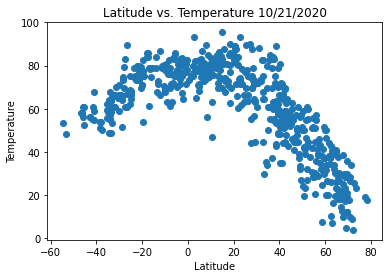

<Figure size 432x288 with 0 Axes>

In [23]:
x_values= clean_dataframe['lat']
y_values=clean_dataframe['Max Temp']
plt.scatter(x_values, y_values)
plt.title(f"Latitude vs. Temperature {Date}")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
plt.savefig("datafig101.png")

## Latitude vs. Humidity Plot

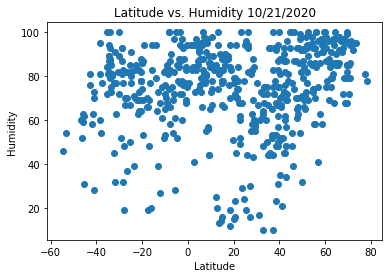

<Figure size 432x288 with 0 Axes>

In [24]:
x_values= clean_dataframe['lat']
y_values=clean_dataframe['Humidity']
plt.title(f"Latitude vs. Humidity {Date}")
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig("../output_datafig102.png")

## Latitude vs. Cloudiness Plot

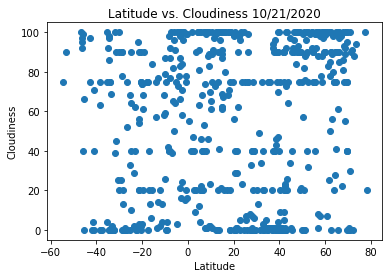

<Figure size 432x288 with 0 Axes>

In [25]:
x_values= clean_dataframe['lat']
y_values=clean_dataframe['Cloudiness']
plt.scatter(x_values, y_values)
plt.title(f"Latitude vs. Cloudiness {Date}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("../output_datafig103.png")

## Latitude vs. Wind Speed Plot

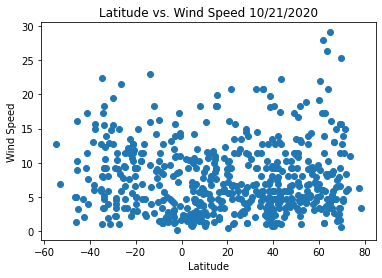

<Figure size 432x288 with 0 Axes>

In [26]:
x_values=clean_dataframe ['lat']
y_values=clean_dataframe['Wind Speed']
plt.scatter(x_values, y_values)
plt.title(f"Latitude vs. Wind Speed {Date}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig("../output_datafig104.png")

## Linear Regression

In [27]:
#What are we doing for linear regression? Check x and y values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values=x_values * slope + intercept
print(regress_values)

0      7.735505
1      7.661580
2      7.566244
3      7.565721
4      7.566356
         ...   
556    7.707932
557    7.757532
558    7.725984
559    7.651761
560    7.730502
Name: lat, Length: 561, dtype: float64


In [28]:
clean_dataframe['hemisphere']=np.where(clean_dataframe['lat']>0, 'north', 'South')
clean_dataframe


,Name,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,hemisphere
0,Bakchar,57.02,82.07,38.80,75,88,8.34,RU,10/21/2020,north
1,Tabuk,17.42,121.44,73.04,88,100,4.23,PH,10/21/2020,north
2,Busselton,-33.65,115.33,48.99,75,1,10.56,AU,10/21/2020,South
3,Cape Town,-33.93,18.42,57.99,87,0,18.34,ZA,10/21/2020,South
4,Port Alfred,-33.59,26.89,63.54,85,0,12.35,ZA,10/21/2020,South
...,...,...,...,...,...,...,...,...,...,...
556,Broome,42.25,-75.83,69.80,60,20,13.87,US,10/21/2020,north
557,Qasigiannguit,68.82,-51.19,28.40,68,89,3.36,GL,10/21/2020,north
558,Khomutovka,51.92,34.56,43.20,82,100,4.23,RU,10/21/2020,north
559,Gusau,12.16,6.66,79.90,25,0,5.35,NG,10/21/2020,north


In [29]:
north_dataframe=weather_data_df.copy()
north_dataframe=clean_dataframe.loc[~(clean_dataframe["hemisphere"]=="north")]
north_dataframe

,Name,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,hemisphere
2,Busselton,-33.65,115.33,48.99,75,1,10.56,AU,10/21/2020,South
3,Cape Town,-33.93,18.42,57.99,87,0,18.34,ZA,10/21/2020,South
4,Port Alfred,-33.59,26.89,63.54,85,0,12.35,ZA,10/21/2020,South
5,Mar del Plata,-38.00,-57.56,54.00,54,0,14.99,AR,10/21/2020,South
9,Atuona,-9.80,-139.03,77.83,70,0,16.20,PF,10/21/2020,South
...,...,...,...,...,...,...,...,...,...,...
543,Plettenberg Bay,-34.05,23.37,60.46,73,0,3.38,ZA,10/21/2020,South
544,Poya,-21.35,165.15,78.69,64,3,2.95,NC,10/21/2020,South
545,Inyonga,-6.72,32.07,72.00,69,82,1.70,TZ,10/21/2020,South
546,Kokopo,-4.35,152.26,80.58,78,73,4.34,PG,10/21/2020,South


In [30]:
south_dataframe=weather_data_df.copy()
south_dataframe=clean_dataframe.loc[~(clean_dataframe["hemisphere"]=="South")]
south_dataframe

,Name,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,hemisphere
0,Bakchar,57.02,82.07,38.80,75,88,8.34,RU,10/21/2020,north
1,Tabuk,17.42,121.44,73.04,88,100,4.23,PH,10/21/2020,north
6,Los Llanos de Aridane,28.66,-17.92,71.60,60,40,1.12,ES,10/21/2020,north
7,Beringovskiy,63.05,179.32,40.53,79,89,8.34,RU,10/21/2020,north
8,Kahului,20.89,-156.47,87.80,45,1,8.05,US,10/21/2020,north
...,...,...,...,...,...,...,...,...,...,...
556,Broome,42.25,-75.83,69.80,60,20,13.87,US,10/21/2020,north
557,Qasigiannguit,68.82,-51.19,28.40,68,89,3.36,GL,10/21/2020,north
558,Khomutovka,51.92,34.56,43.20,82,100,4.23,RU,10/21/2020,north
559,Gusau,12.16,6.66,79.90,25,0,5.35,NG,10/21/2020,north


In [31]:
def linearreg(x_val, y_val, x_label, y_label, posn, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    print(f"The r-squared is: {rvalue**2}")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")
    plt.annotate(line_eq,posn,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(Title)
    plt.show()

The r-squared is: 0.5229626056390814


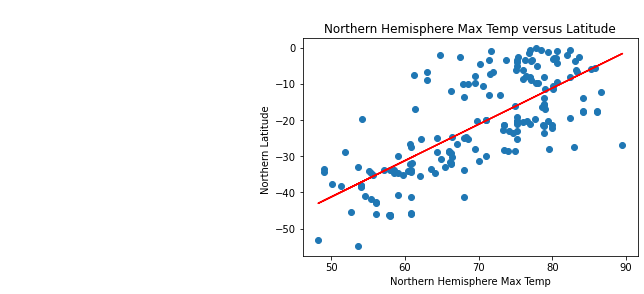

The r-value is: 0.00014528788712605775


<Figure size 432x288 with 0 Axes>

In [33]:
x_val= north_dataframe['Max Temp']
y_val=north_dataframe['lat']
x_label=('Northern Hemisphere Max Temp')
y_label=('Northern Latitude ')
posn=(6,8)
title= "Northern Hemisphere Max Temp versus Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../output_datafig105.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7389738030325125


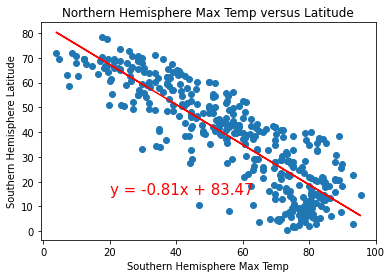

The r-value is: 0.00014528788712605775


<Figure size 432x288 with 0 Axes>

In [34]:
x_val= south_dataframe['Max Temp']
y_val=south_dataframe['lat']
x_label=('Southern Hemisphere Max Temp')
y_label=('Southern Hemisphere Latitude' )
posn=(20,15)
title="Southern Hemisphere Max Temp Vs. Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../output_datafig106.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03163766476721682


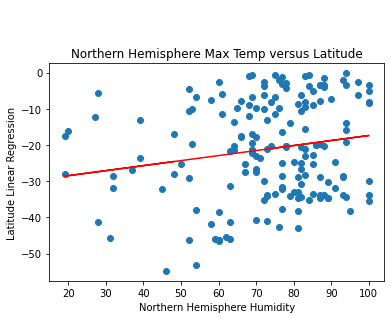

The r-value is: 0.00014528788712605775


<Figure size 432x288 with 0 Axes>

In [35]:
x_val= north_dataframe['Humidity']
y_val=north_dataframe['lat']
x_label=('Northern Hemisphere Humidity')
y_label=('Latitude Linear Regression')
posn=(20,15)
plt.Title="Northern Hemisphere Humidity vs Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("../output_datafig107.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04237302061849445


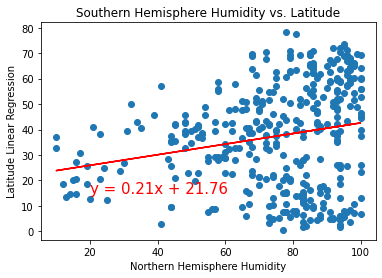

The r-value is: 0.00014528788712605775


<Figure size 432x288 with 0 Axes>

In [36]:
x_val= south_dataframe['Humidity']
y_val=south_dataframe['lat']
# Label plot and annotate the line equation
plt.xlabel('Southern Hemisphere Humididty')
plt.ylabel('Southern Latitude Latitude Linear Regression')
posn=(20,15)
Title='Southern Hemisphere Humidity vs. Latitude'
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_datafig108.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02408409602514658


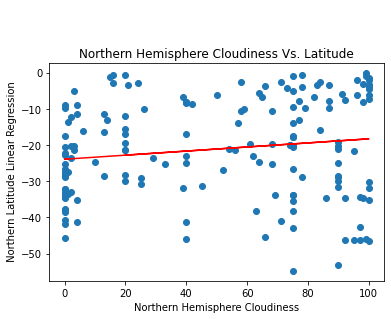

The r-value is: 0.00014528788712605775


<Figure size 432x288 with 0 Axes>

In [37]:
x_val= north_dataframe['Cloudiness']
y_val=north_dataframe['lat']
x_label=('Northern Hemisphere Cloudiness')
y_label=(' Northern Latitude Linear Regression')
posn=(20,15)
Title="Northern Hemisphere Cloudiness Vs. Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_datafig109.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.026586704721385645


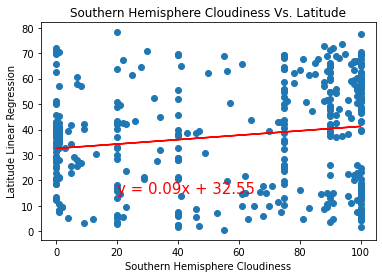

The r-value is: 0.00014528788712605775


<Figure size 432x288 with 0 Axes>

In [38]:
x_val=south_dataframe['Cloudiness']
y_val=south_dataframe['lat']
x_label=('Southern Hemisphere Cloudiness')
y_label=('Latitude Linear Regression')
posn=(20,15)
Title="Southern Hemisphere Cloudiness Vs. Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_datafig110.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.026586704721385645


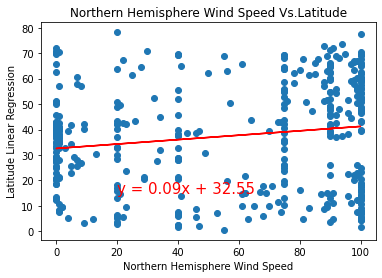

The r-value is: 0.00014528788712605775


<Figure size 432x288 with 0 Axes>

In [39]:
x_values= north_dataframe['Wind Speed']
y_values=north_dataframe['lat']
# Label plot and annotate the line equation
x_label=('Northern Hemisphere Wind Speed')
y_label=('Latitude Linear Regression')
posn=(20,15)
Title="Northern Hemisphere Wind Speed Vs.Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_datafig111.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.026545304017794872


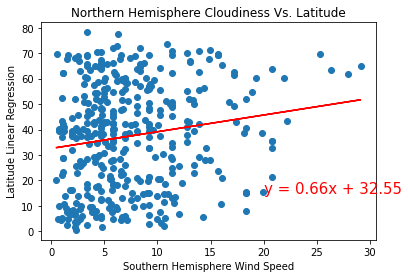

The r-value is: 0.00014528788712605775


<Figure size 432x288 with 0 Axes>

In [40]:
x_val=south_dataframe['Wind Speed']
y_val=south_dataframe['lat']
# Label plot and annotate the line equation
x_label=('Southern Hemisphere Wind Speed')
y_label=('Latitude Linear Regression')
posn=(20,15)
Title="Northern Hemisphere Cloudiness Vs. Latitude"
linearreg(x_val, y_val, x_label, y_label, posn, title)
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_datafig112.png")
